<a href="https://colab.research.google.com/github/megatAhmad/sma_2023_oct/blob/main/Python_OutliersAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective of the Notebook
1.   What is outliers - how one data is classified as outliers - global, local, context
2.   How do we identify the outliers in our data
3.   When should we treat them and when should we not ?
4.   How to remove outliers in Python



### What are Outliers ?


1.   Outliers are data points that does not behave like the others - the norm / the population
2.   Outliers are normally considered as an error, but on some cases they are based on significant event
3.   How do we classify the norm ?
     1.   Based on single angle/ variable
     2.   From multi angle/variable
     3.   From one angle, but throughout time
4.    


# Method to identify outliers
1.   Standard Deviation
 *   Method:
      *   68% data within 1 std dev
      *   95% data within 2 std dev
      *   99.7% data within 3 std dev
      *   Data beyond 3 std dev is an outlier
      *   Data is analyzed in one dimension
 *   Assumption :
      *   Data is normal distributed

2.   Boxplot & Interquartiles Range (IQR)
 *   Method:
      *   Data are binned into quartiles
      *   IQR = Q3 - Q1
      *   Upper Whiskers = Q3 + 1.5*IQR
      *   Lower Whiskers = Q1 + 1.5*IQR
      *   Data beyond upper/lower whiskers is an outlier
      *   Data is analyzed in one dimension
 *   Assumption :
      *   TBC

2.   DBScan
 *   Method:
      *   For single/multi dimension analysis
      *   Cluster (Density based) data into groups
      *   
      *   X
      *   X
 *   Assumption :
      *   TBC
    




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [3]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [4]:
def plot_boxplot_and_hist(data, variable):

    # creating a figure composed of two matplotlib.Axes
    # objects (ax_box and ax_hist)

    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

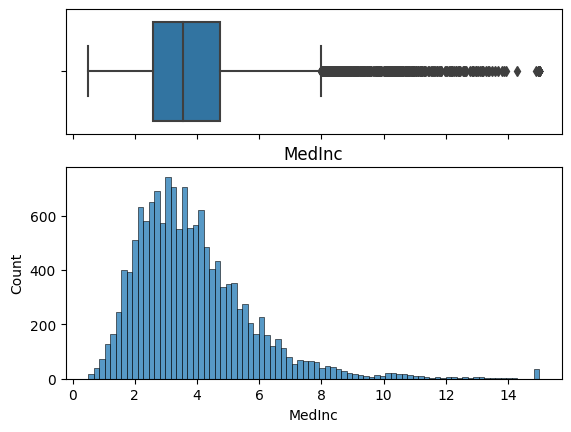

In [5]:
plot_boxplot_and_hist(X_train, "MedInc")

# Method 1: IQR

In [6]:
def find_limits(df, variable, fold):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)

    return lower_limit, upper_limit

In [7]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(-3.925900000000002, 11.232600000000001)

In [8]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [9]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [10]:
X_train.shape, X_test.shape

((14348, 8), (6151, 8))

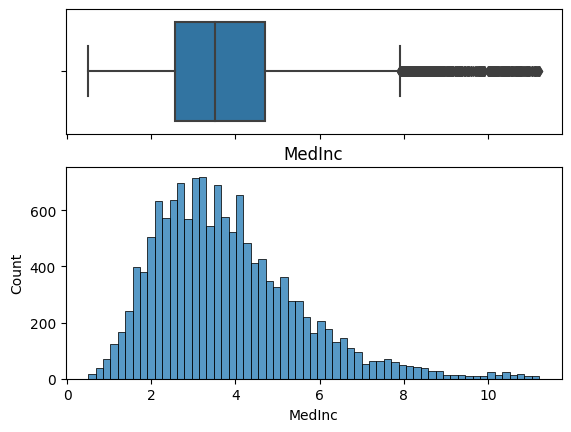

In [11]:
plot_boxplot_and_hist(X_train, "MedInc")

# Method 2: Z-Score

In [12]:
def find_limits(df, variable, fold):

    lower_limit = df[variable].mean() - (df[variable].std() * fold)
    upper_limit = df[variable].mean() + (df[variable].std() * fold)

    return lower_limit, upper_limit

In [13]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [14]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(-1.8068060061060955, 9.540140820613294)

In [15]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [16]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [17]:
X_train.shape, X_test.shape

((14211, 8), (6082, 8))

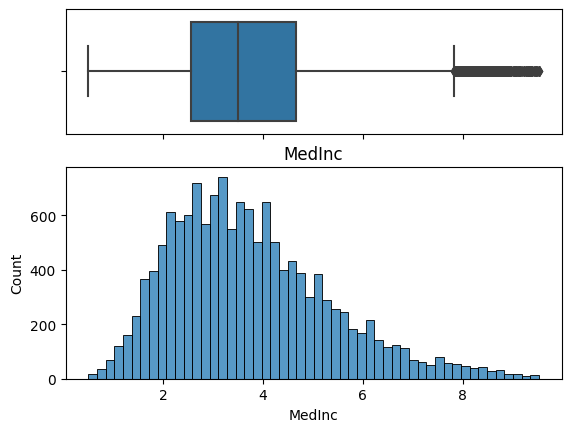

In [18]:
plot_boxplot_and_hist(X_train, "MedInc")

# Method 3: DBScan

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

from sklearn import datasets
from sklearn.datasets import load_iris



In [22]:
iris = load_iris()

# Get the data and target as lists
data = iris.data.tolist()
target = iris.target.tolist()

# Combine the data and target into a single list
iris_list = []
for i in range(len(data)):
    iris_list.append([data[i][0], data[i][1], data[i][2], data[i][3], target[i]])

iris_df = pd.DataFrame(iris_list, columns=iris.feature_names + ['target'])

In [26]:
new_column_names = {'sepal length (cm)': 'Sepal_Length',
                   'sepal width (cm)': 'Sepal_Width',
                   'petal length (cm)': 'Petal_Length',
                   'petal width (cm)': 'Petal_Width',
                   'target': 'Species'}

iris_df = iris_df.rename(columns=new_column_names)

iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df = iris_df.copy()

df.columns =['Sepal_Length','Sepal_Width', 'Petal_Length', 'Petal_Width','Species']



data = df.iloc[:,0:4].values

target = df.iloc[:,4].values

df[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


In [29]:
outlier_df = pd.DataFrame(data)
print(Counter(model.labels_))

print(outlier_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

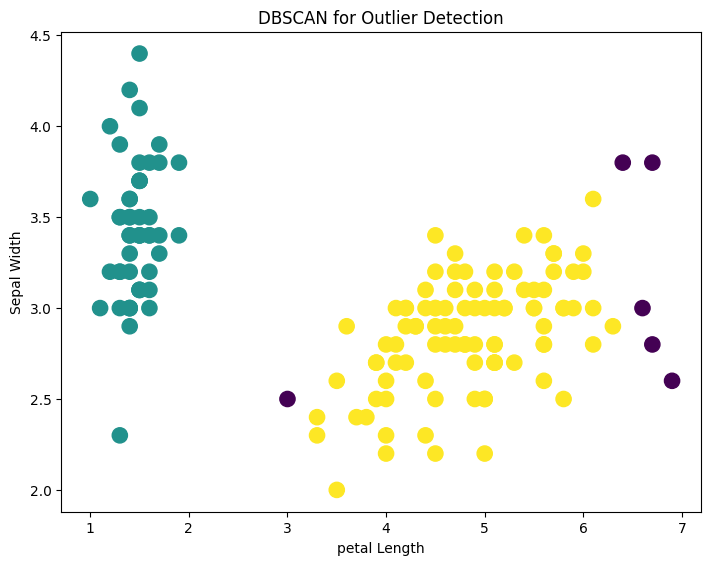

In [30]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)

ax.set_xlabel('petal Length')
ax.set_ylabel('Sepal Width')

plt.title('DBSCAN for Outlier Detection')